In [2]:
from calibrimbore import sauronron
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

Making a composite filter of input band and ps1


<IPython.core.display.Javascript object>


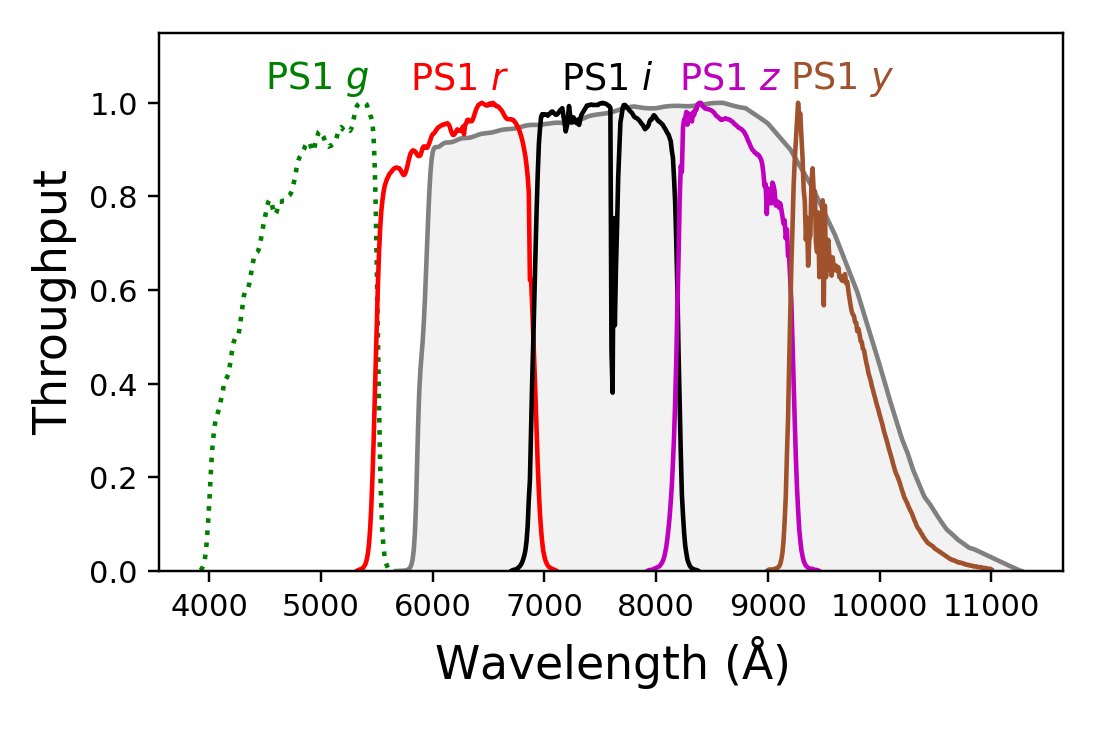

<IPython.core.display.Math object>

<IPython.core.display.Javascript object>


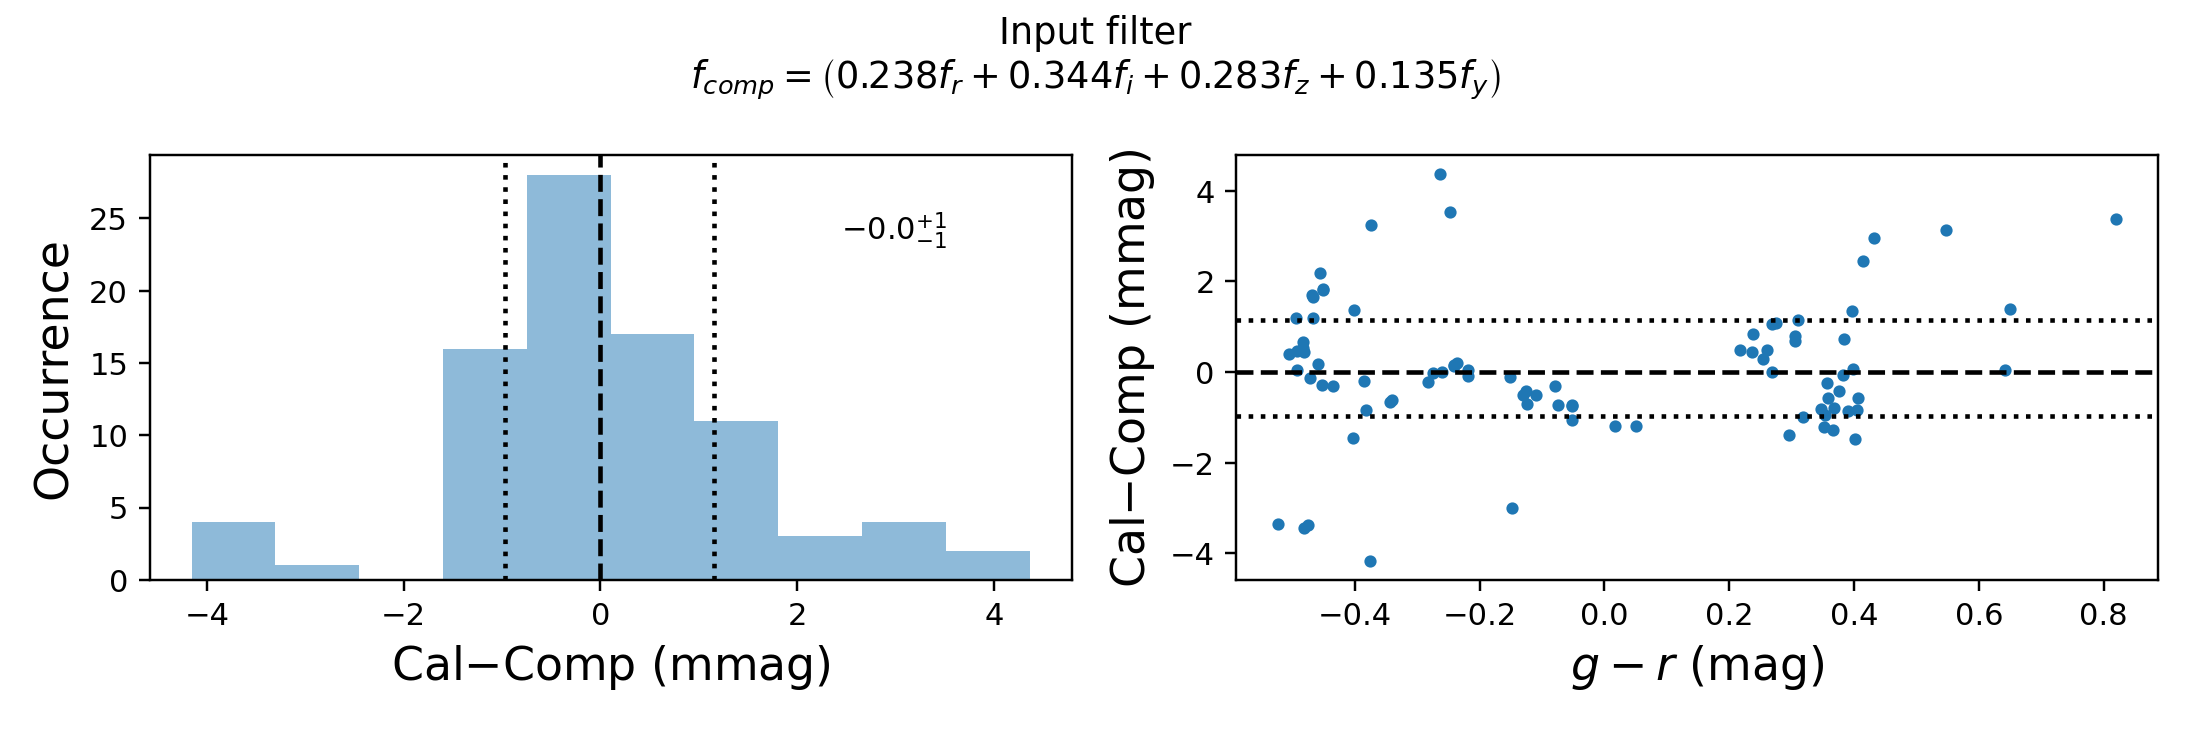

<IPython.core.display.Javascript object>


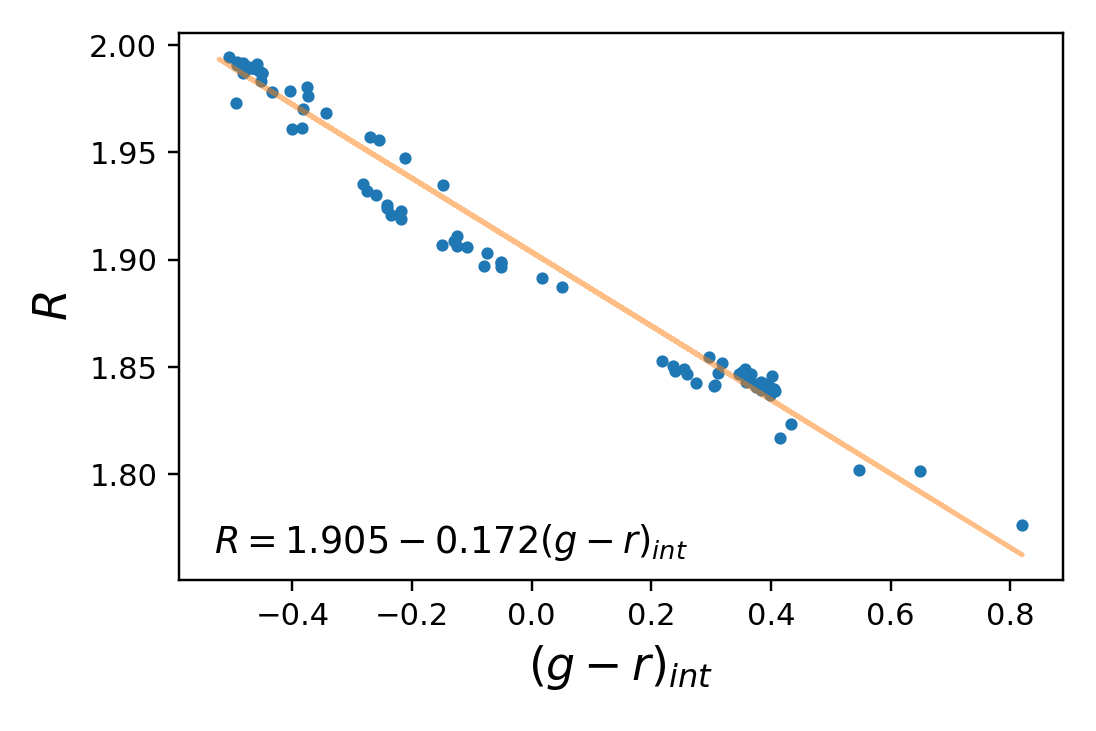

In [5]:
cal = sauron('../../src/data/filters/TESS/TESS.dat',filters='auto',cubic_corr=False,plot=True,color_correction=False,system='ps1')


In [9]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig_width_pt = 240.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches

In [7]:
self = cal

<IPython.core.display.Javascript object>


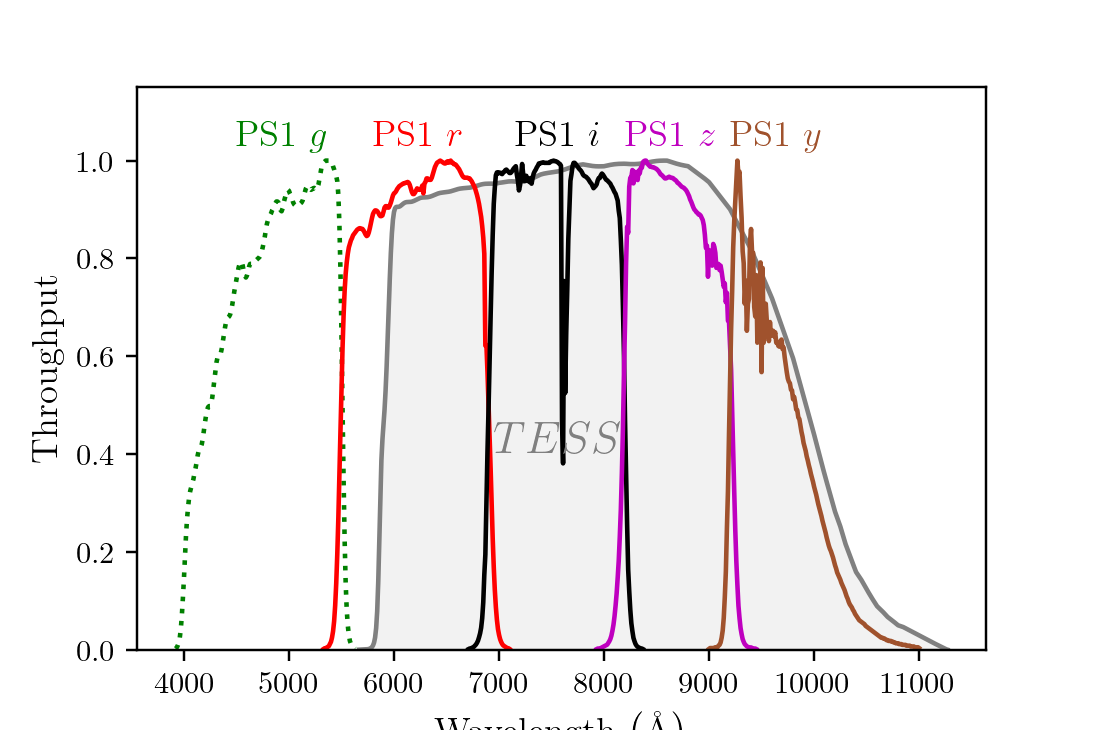

In [20]:
plt.figure(figsize=(1.5*fig_width,1*fig_width))

plt.fill_between(self.band.wave,self.band.throughput/np.nanmax(self.band.throughput),
                 color='k',alpha=0.05)
plt.plot(self.band.wave,self.band.throughput/np.nanmax(self.band.throughput),
         color='grey',label='Input filter')
plt.text(6950,0.4,'$TESS$',color='grey',fontsize=15)
colors = self._set_color_palette()
filts = self._set_filts()
lab = self._set_plot_label()


k = 0
for f in filts:
    if f in self.sys_filters:
        plt.plot(self._sys_bands[f].wave,
                 self._sys_bands[f].throughput/np.nanmax(self._sys_bands[f].throughput),
                 '-',color=colors[k],label=lab + f)
    else:
        plt.plot(self._sys_bands[f].wave,
                 self._sys_bands[f].throughput/np.nanmax(self._sys_bands[f].throughput),
                 ':',color=colors[k],label=lab + f)
    k += 1

if self.system == 'ps1':
    plt.text(4500,1.03,'PS1 $g$',color='g',fontsize=12)
    plt.text(5800,1.03,'PS1 $r$',color='r',fontsize=12)
    plt.text(7150,1.03,'PS1 $i$',color='k',fontsize=12)
    plt.text(8200,1.03,'PS1 $z$',color='m',fontsize=12)
    plt.text(9200,1.03,'PS1 $y$',color='sienna',fontsize=12)



plt.ylim(0,1.15)



plt.ylabel('Throughput',fontsize=12)
plt.xlabel(r'Wavelength $\left(\rm \AA \right)$',fontsize=12)

plt.savefig('ps1_tess_filt_comparison.pdf',bbox_inches='tight')